In [2]:
import pandas as pd 
import chardet
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import numpy as np

In [3]:
mpl.rc('font', family='serif')

In [4]:
filename = 'Mylist.xlsx'
df = pd.read_excel(filename, engine='openpyxl')
df

,Sectors,Expenditure
0,Sheep and lambs,0
1,Shorn wool,0
2,"Oats, sorghum and other cereal grains",0
3,Wheat,0
4,Barley,0
...,...,...
340,Interest groups and community organisations,600
341,Police,0
342,Corrective centres,0
343,Fire brigade,0


In [5]:
df_filtered = df[df['Expenditure'] != 0]
df_filtered

,Sectors,Expenditure
13,Eggs,210
14,Vegetables,1235
15,Fruit,890
39,Prawns,120
40,Raw fish,100
...,...,...
327,"Library, museum and art gallery services",50
328,"Parks, botanical gardens and zoos",50
332,Entertainment,50
333,Lottery,20


In [6]:
df_sorted = df.sort_values(by='Expenditure', ascending=False)
df_sorted
top_10 = df_sorted.head(10)
top_10

,Sectors,Expenditure
320,Education,54500
294,Real estate agent services,15840
258,"Hotels, clubs, restaurants and cafes",2800
268,Air and space transport,2500
14,Vegetables,1235
286,Health insurance,1224
117,Clothing,1200
205,Electronic equipment,1200
74,Fresh meat,1100
266,Transport services,1080


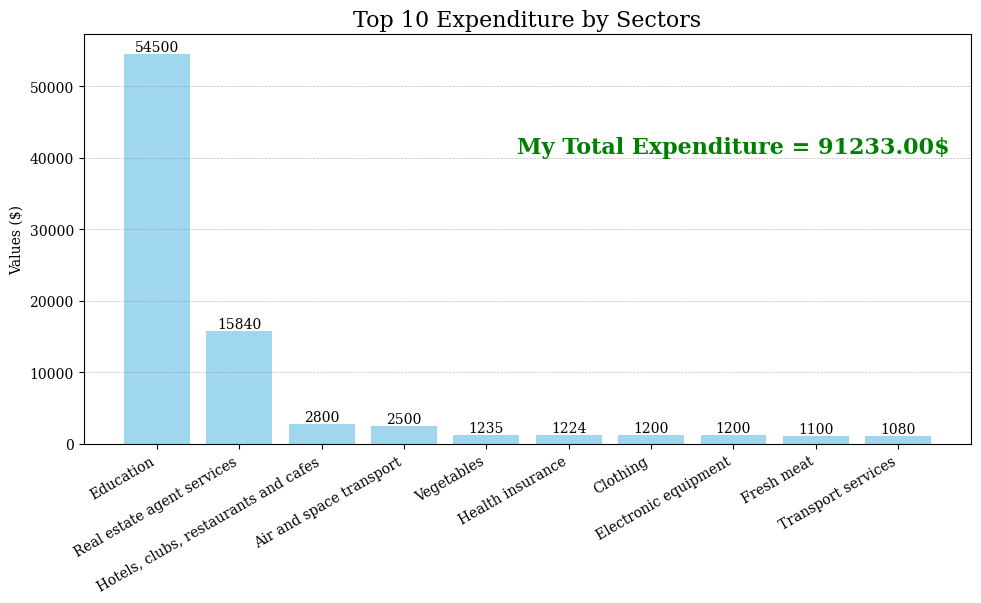

In [9]:
#plot Top 10 Expenditure by Sectors
x = top_10['Sectors']
y = top_10['Expenditure']
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray',alpha = 0.5)
bars = ax.bar(x, y, color='skyblue',alpha=0.8)

for bar in bars:
    yval = bar.get_height()  
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1,  
            str(yval), ha='center', va='bottom', fontsize=10) 
ax.set_title('Top 10 Expenditure by Sectors',fontsize=16)
ax.text(7, 40000, 'My Total Expenditure = 91233.00$',ha='center', va='bottom', fontsize=16,fontweight='bold',
        color = 'green') 
#ax.set_xlabel('I')
ax.set_ylabel('Values ($)')

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25) 
plt.savefig('My Top 10 Expenditure by Sector.png',dpi=300)

In [11]:
filename = 'Myfootprint.xlsx'
df_fp = pd.read_excel(filename, engine='openpyxl')
df_fp_filtered = df[df_fp['Footprint'] != 0]
#df_fp_filtered
df_fp_sorted = df_fp.sort_values(by='Footprint', ascending=False)
fp_top_10 = df_fp_sorted.head(10)
fp_top_10
#fp_top_10['Sectors']

,Sectors,Footprint,q
320,Education,4.229577,0.003674
74,Fresh meat,2.613400,0.090931
268,Air and space transport,1.644994,0.344448
294,Real estate agent services,1.272202,0.002770
73,Meat products,1.239824,0.112241
76,"Poultry, slaughtered",0.829895,0.217898
205,Electronic equipment,0.737538,0.448305
117,Clothing,0.663389,0.422621
14,Vegetables,0.616774,0.225808
258,"Hotels, clubs, restaurants and cafes",0.585523,0.003197


<class 'pandas.core.series.Series'>


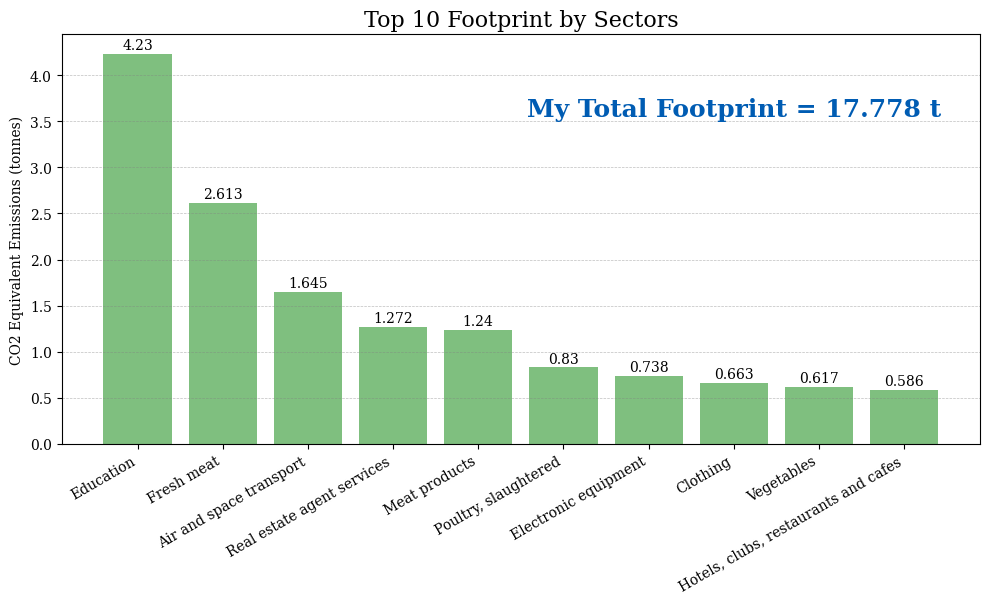

In [12]:
#plot Top 10 Footprint by Sectors
x = fp_top_10['Sectors']
y = fp_top_10['Footprint']
y = np.round(y,3)
print(type(y))
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray',alpha = 0.5)
bars = ax.bar(x, y, color='green',alpha=0.5)

for bar in bars:
    yval = bar.get_height()  
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02,  
            str(yval), ha='center', va='bottom', fontsize=10) 
ax.text(7, 3.5, 'My Total Footprint = 17.778 t',ha='center', va='bottom', fontsize=18,fontweight='bold',
        color = '#005cb3') 
ax.set_title('Top 10 Footprint by Sectors',fontsize=16)
#ax.set_xlabel('I')
ax.set_ylabel('CO2 Equivalent Emissions (tonnes)')

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25) 
plt.savefig('My Top 10 Footprint by Sector.png',dpi=300)

In [13]:
df_q_sorted = df_fp.sort_values(by='q', ascending=False)
df_q_sorted
df_both = df_q_sorted[df_q_sorted['Footprint'] != 0]
df_both
q_top_15 = df_both.head(10)
q_top_15

,Sectors,Footprint,q
328,"Parks, botanical gardens and zoos",0.138106,2.629590
78,Treated milk,0.272711,2.522359
118,Footwear,0.369429,0.468513
205,Electronic equipment,0.737538,0.448305
117,Clothing,0.663389,0.422621
268,Air and space transport,1.644994,0.344448
13,Eggs,0.111233,0.315741
332,Entertainment,0.015943,0.263399
15,Fruit,0.448271,0.229223
14,Vegetables,0.616774,0.225808


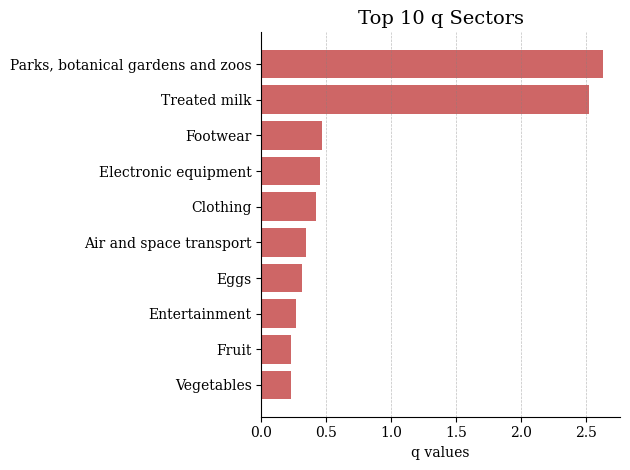

In [15]:
#plot Top 10 q Sectors
x = q_top_15['Sectors']
y1 = q_top_15['q']
y2 = q_top_15['Footprint']
y11 = y1[::-1]
x11 = x[::-1]
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(True, axis='x', linestyle='--', linewidth=0.5, color='gray',alpha = 0.5)
ax.set_title('Top 10 q Sectors',fontsize=14)

ax.set_xlabel('q values')

plt.barh(x11, y11, color='#CE6666')
plt.tight_layout()
plt.savefig('Top 10 q.png',dpi=300)